# Classification
- Classification SVM à marge souple (LinearSVC et Pipeline)
- Classification SVM non linéaire (LinearSVC et Pipeline polynomial)
- Classification Noyeau polynomial (SVC kernel poly et Pipeline)
- Classification Noyau Radial Gaussien (SVC Kernel rbf et Pipeline standard)

### Préparation d'une classification

In [15]:
import matplotlib.pyplot as plt
from sklearn import datasets
faces = datasets.fetch_olivetti_faces() 
print(faces.data.shape)
X=faces.data
y=faces.target
print(X.shape)
print(y.shape)   

# Split de toutes les données
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,shuffle=True, random_state=0)
print(X_train.shape, X_test.shape)

# Si besoin d'une décomposition
from sklearn import decomposition
pca = decomposition.PCA(n_components=150, whiten=True, svd_solver='randomized')
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(400, 4096)
(400, 4096)
(400,)
(300, 4096) (100, 4096)
(300, 150)
(100, 150)


### *Classification noyau polynomial (SVC Kernel)*

In [6]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

### *Classification linéaire avec SGDC*

In [14]:
from  sklearn.linear_model  import  SGDClassifier

sg_clf = SGDClassifier(random_state=42)
sg_clf.fit(X_train_pca, y_train)
y_pred_sg = sg_clf.predict(X_test_pca)

### *Classification avec "Kernel="poly"*

In [22]:
import numpy as np
#génération de données
np.random.seed(42)
m = 100
x = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * x + 0.5 * x**2 + np.random.randn(m, 1)/10).ravel()
    

#Appliquer une regression polynomiale
import operator

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
model = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")

#Entrainement
model.fit(x, y)

#Prédiction
y_poly_pred = model.predict(x)

#Affcihage des métrique rmse et r2
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("rmse = ",rmse)
print("r2 = ",r2)

rmse =  0.10040492646091594
r2 =  0.71822657365254


#### Lecture du graph

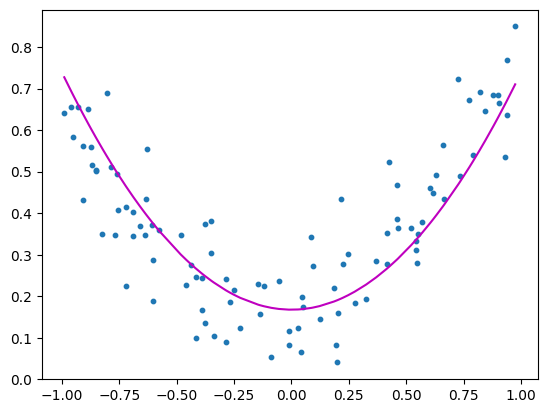

In [23]:
#Affichage du graphique
plt.scatter(x, y, s=10)
# trier les valeurs avant le tracé
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

### *Classification SVM Multiclasses*

[9]
[6]


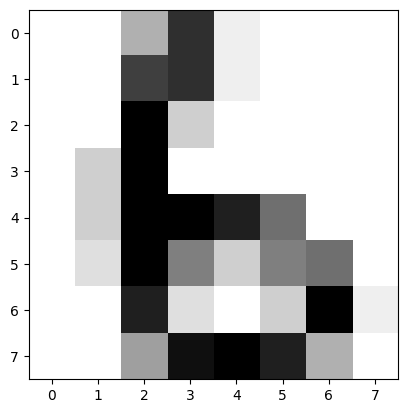

In [20]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics

# La base de données digits
digits = datasets.load_digits()
X1=digits.images
Y1=digits.target

#affcihage d'une image
some_digit = X1[109]#5
plt.imshow(some_digit,cmap = matplotlib.cm.binary,interpolation='nearest')

#Pour appliquer un classificateur sur ces données, nous devons aplatir l'image,
# transformer les données dans une matrice (nbr_dimages, nbr_de_pixels):
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# créer un classifieur SVM
classifier = svm.SVC(gamma=0.001)

# Partager la base de données en 2 bases : une base d'apprentissage + une base de test
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Entrainer le classifieur sur la base d'apprentissage
classifier.fit(X_train, y_train)

# prédiction sur quelques images de la base de test et vérification visuelle
print(classifier.predict(X_test[[3]]))
plt.imshow(X_test[[3]].reshape(8,8),cmap = matplotlib.cm.binary,interpolation='nearest')

print(classifier.predict(X_test[[137]]))
plt.imshow(X_test[[137]].reshape(8,8),cmap = matplotlib.cm.binary,interpolation='nearest')

# Prédiction sur la base de test:
predicted = classifier.predict(X_test)

#### Lecture du graph

### *Régression SVM*

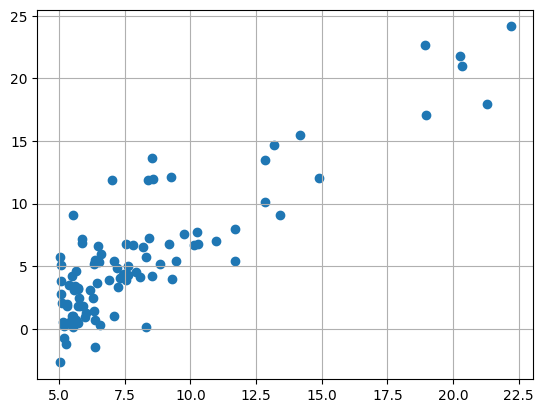

In [17]:
#Réression linéaire
#####################
#1)chargement des données
import pandas as pd
path="donnees/donnees_TP2.csv"
df = pd.read_csv(path)

#selection de la première colonne de notre dataset et redimensionnement
X = df.iloc[0:len(df),0]
X=X.values.reshape(len(X),1)
#selection de deuxième colonnes de notre dataset et redimensionnement
Y = df.iloc[0:len(df),1] 
Y=Y.values.reshape(len(X),1).ravel()

#2)visualisation des données
import matplotlib.pyplot as plt
axes = plt.axes()
axes.grid() # dessiner une grille pour une meilleur lisibilité du graphe
plt.scatter(X,Y) # X et Y sont les variables extraites dans le paragraphe précédent

In [ ]:
from sklearn.svm import LinearSVR
model = LinearSVR(epsilon=1.5,max_iter=1200000)

# Entrainement du modèle
model.fit(X, Y)

### *Matrices de confusion et tout le tintouin*

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,multilabel_confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(multilabel_confusion_matrix(y_test, y_pred))

### *Fonction jolie matrice de confusion*

In [ ]:
def confusion_matrix_ascii(confusion_matrix):
  # Création de la table ASCII
  print('+------------+------------+------------+')

  # En-tête de la table
  print('|            | Positif    | Négatif    |')
  print('+------------+------------+------------+')

  # Lignes de la table
  for i, row in enumerate(confusion_matrix):
    if i == 0:
      print('| Réel positif |', end='')
    else:
      print('| Réel négatif |', end='')
    for cell in row:
      print(f' {cell:10d} |', end='')
    print()
    print('+------------+------------+------------+')


# Régression
- Régression SVM Linéaire (Linear SVR)
- Régression SVM non Linéaire (SVR kernel=poly)
- Régression linéaire classique 

### *Régression linéaire classique*

prediction(21.72) =  22.146742349465455


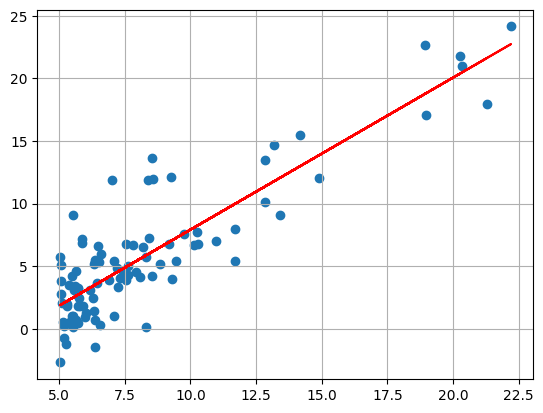

In [25]:
#1)chargement des données
import pandas as pd
path="donnees/donnees_TP2.csv"
df = pd.read_csv(path)
#error_bad_lines=False
#selection de la première colonne de notre dataset (la taille de la population)
X = df.iloc[0:len(df),0]
#selection de deuxième colonnes de notre dataset (le profit effectué)
Y = df.iloc[0:len(df),1] 

#2)visualisation des données
import matplotlib.pyplot as plt
axes = plt.axes()
axes.grid() # dessiner une grille pour une meilleur lisibilité du graphe
plt.scatter(X,Y) # X et Y sont les variables qu'on a extraite dans le paragraphe précédent


#3)Apliquer l'algo
from scipy import stats
#linregress() renvoie plusieurs variables de retour. On s'interessera 
# particulierement au slope et intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

#4) effectuer des prédictions
def prediction(x):
   return slope * x + intercept

#la variable fitLine sera un tableau de valeurs prédites depuis la tableau de variables X
fitLine = prediction(X)
plt.plot(X, fitLine, c='r')

print("prediction(21.72) = ",prediction(21.72))
# retourne : 22.146742349465455


### *Régression polynomiale*

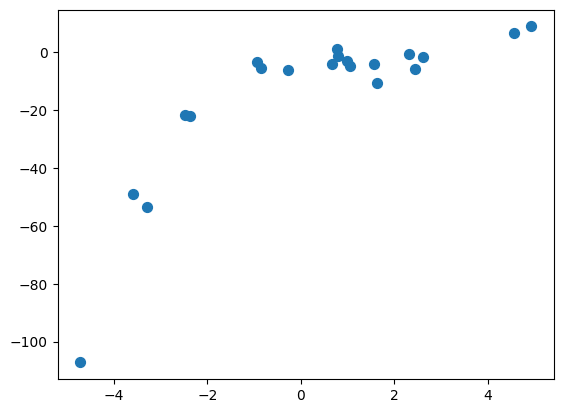

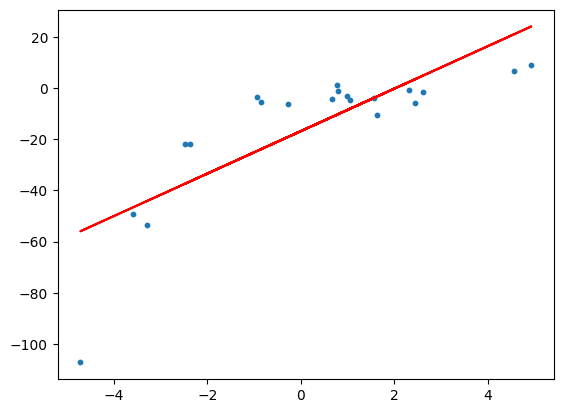

rmse =  15.908242501429998
r2 =  0.6386750054827146
rmse =  10.120437473614711
r2 =  0.8537647164420812


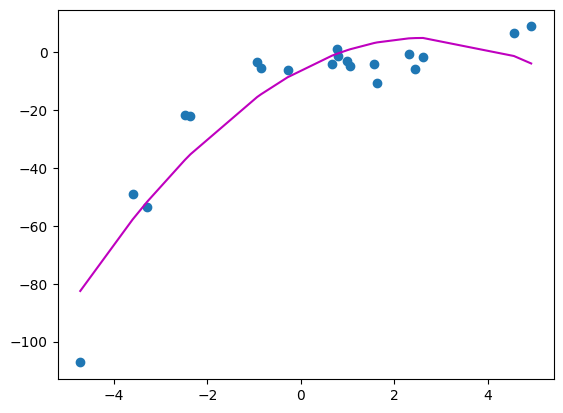

rmse =  23.188985407100322
r2 =  0.23225482806073816


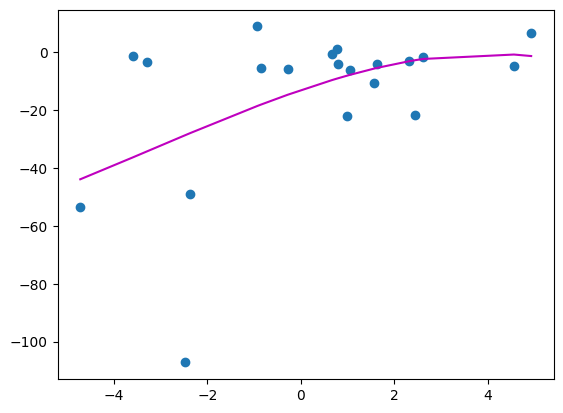

rmse =  3.0405648201749114
r2 =  0.986800358617135


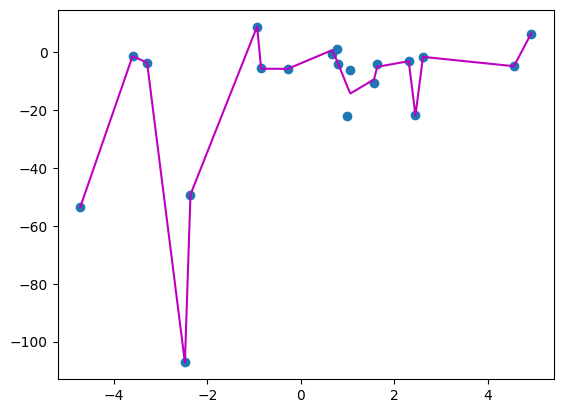

In [26]:
import numpy as np
import matplotlib.pyplot as plt

#génération de données
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
plt.scatter(x,y, s=50 )
plt.show()

#appliquer une regression linéaire
from sklearn.linear_model import LinearRegression

# transformer les données pour ajouter un nouvea axe
x = x[:, np.newaxis]
y = y[:, np.newaxis]

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.show()
#calcul de l'erreur quadratique moyenne et du score R2
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print("rmse = ",rmse)
print("r2 = ",r2)

#appliquer une regression polynomiale
import operator
from sklearn.preprocessing import PolynomialFeatures

#appliquer une transformation polynomialede degré 2 aux données x pour avoir x_poly
#polynomial_features= PolynomialFeatures(degree=2)
#polynomial_features= PolynomialFeatures(degree=3)
for nbr in [2,3,20]:
    polynomial_features= PolynomialFeatures(degree=nbr)
    x_poly = polynomial_features.fit_transform(x)
    #print("x = ",x)
    #print("x_poly = ",x_poly)

    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)

    rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
    r2 = r2_score(y,y_poly_pred)
    print("rmse = ",rmse)
    print("r2 = ",r2)

    plt.scatter(x,y)
    # trier les valeurs de x avant le tracé
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
    x, y_poly_pred = zip(*sorted_zip)
    plt.plot(x, y_poly_pred, color='m')
    plt.show()

#Avec un degree=20 on est face à un phénomène d'overfitting (surajustement)

# Voisins les plus proches
- méthodes des K-NN

prédiction =  [[21.02266667]]


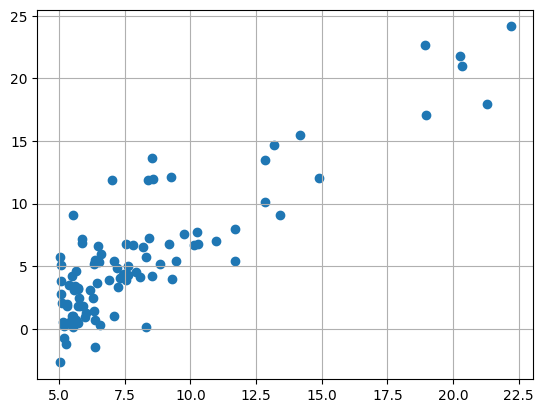

In [27]:
#1)chargement des données
import pandas as pd
path="donnees/donnees_TP2.csv"
df = pd.read_csv(path)
#error_bad_lines=False
#selection de la première colonne de notre dataset (la taille de la population)
X = df.iloc[0:len(df),0]
X=X.values.reshape(len(X),1)
#selection de deuxième colonnes de notre dataset (le profit effectué)
Y = df.iloc[0:len(df),1] 
Y=Y.values.reshape(len(X),1)
#2)visualisation des données
import matplotlib.pyplot as plt
axes = plt.axes()
axes.grid() # dessiner une grille pour une meilleur lisibilité du graphe
plt.scatter(X,Y) # X et Y sont les variables qu'on a extraite dans le paragraphe précédent


#3)Apliquer l'algo
import sklearn.neighbors
# Selection de l'algorihtme des k plus proches voisins
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
# Entrainement du modèle
model.fit(X, Y)


#4) effectuer des prédictions
X_new = [[21.72]]
print("prédiction = ",model.predict(X_new))


# retourne : 21.02266667

# Arbres de décision
- Arbre de classification 
- Arbre de régression

### *Charger des données*

In [29]:
from sklearn.datasets import load_breast_cancer
bd = load_breast_cancer()
X = bd.data
Y = bd.target
print(X.shape)
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,shuffle=False,random_state=42)

import numpy as np
shuffle_index = np.random.permutation(len(X_train)) 
X_train,Y_train = X_train[shuffle_index],Y_train[shuffle_index]


(569, 30)


### *Decision tree classifier*

In [30]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(criterion="entropy")
tree1.fit(X_train,Y_train)

from sklearn.tree import export_graphviz
import os
from graphviz import Source
with open("trees/cancer.dot", 'w') as f:
    export_graphviz(tree1, out_file=os.path.join( "trees/cancer.dot"),
        feature_names=bd.feature_names[:], class_names=bd.target_names,
        rounded=True, filled=True)
Source.from_file(os.path.join("trees/cancer.dot"))

y_predt=tree1.predict(X_test)

In [ ]:
Source.from_file(os.path.join("trees/cancer.dot"))

### *Matrice conf etc*

In [34]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix ( Y_test ,  y_predt))
from sklearn.metrics import precision_score,recall_score,f1_score
print("precision = ",precision_score(Y_test ,  y_predt))
print("rappel = ",recall_score(Y_test ,  y_predt))
print("f1 = ",f1_score(Y_test ,  y_predt))




[[ 38   1]
 [ 10 122]]
precision =  0.991869918699187
rappel =  0.9242424242424242
f1 =  0.9568627450980391


### *Decision tree regressor*

In [36]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.30,shuffle=False,random_state=42)

print(diabetes.feature_names)

from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(max_depth=3, random_state=42)

clf.fit(X_train, y_train)

from sklearn.tree import export_graphviz
import os
from graphviz import Source
with open("trees/diabetes.dot", 'w') as f:
    export_graphviz(clf, out_file=os.path.join( "trees/diabetes.dot"),
        feature_names=diabetes.feature_names[:],
        rounded=True, filled=True)
Source.from_file(os.path.join("trees/diabetes.dot"))

y_predicted = clf.predict(X_test)
# ERREUR QUADRATIQUE QUE POUR REGRESSOR
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_predicted))

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
3751.8364570061703


# Réseau de neurones
- Kmeans